In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

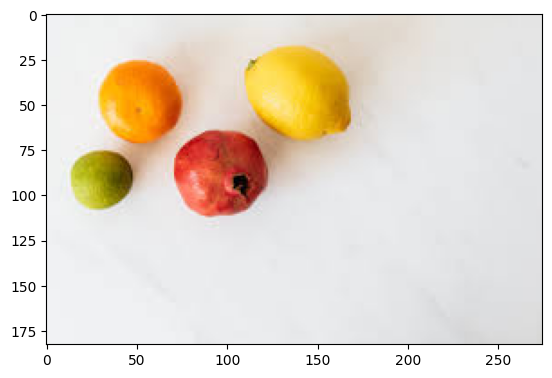

In [2]:
sample_image = cv2.imread('image.jpeg')
img = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)

In [4]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts=10

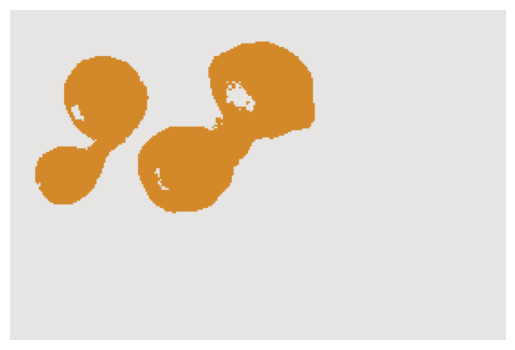

In [5]:
ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.axis('off')
plt.imshow(result_image)

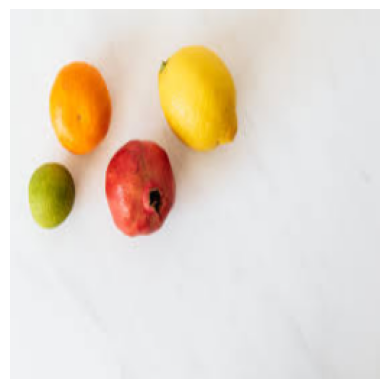

In [6]:
sample_image = cv2.imread('image.jpeg')
img = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(256,256))

plt.axis('off');
plt.imshow(img)

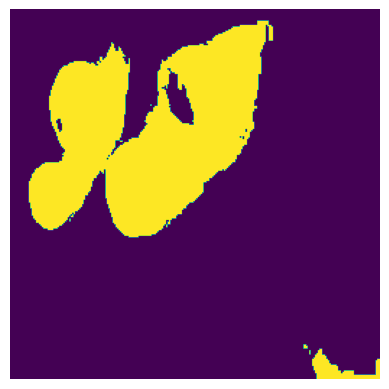

In [7]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)

plt.axis('off')
plt.imshow(thresh)

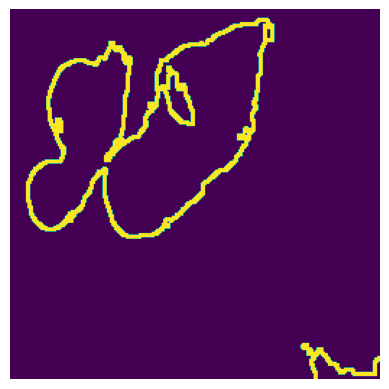

In [8]:
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)

plt.axis('off')
plt.imshow(edges)

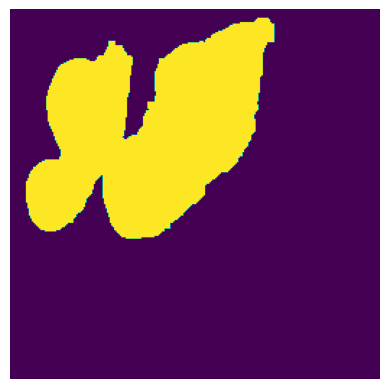

In [9]:
cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
mask = np.zeros((256,256), np.uint8)
masked = cv2.drawContours(mask, [cnt],-1, 255, -1)

plt.axis('off')
plt.imshow(masked)

In [10]:
dst = cv2.bitwise_and(img, img, mask=mask)
# segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

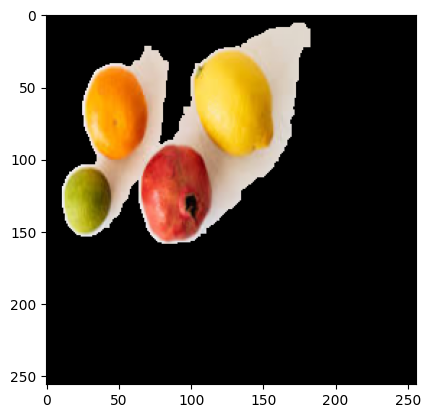

In [13]:
plt.imshow(dst)